#### Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

#### Pre-Processing

In [ ]:
df = pd.read_csv('/content/Chennai.csv', skiprows = 15)
df.head()

,YEAR,MO,DY,T2M_MAX,T2M,T2M_MIN,TS,RH2M,PS,T2MDEW
0,1981,1,30,28.20,23.86,20.91,24.26,73.88,100.81,18.66
1,1981,1,31,28.94,23.80,20.08,24.21,72.62,100.80,18.28
2,1981,2,1,29.12,23.70,19.56,24.35,77.12,100.81,19.10
3,1981,2,2,28.87,23.86,20.24,24.93,79.69,100.79,19.81
4,1981,2,3,28.81,24.03,20.87,24.80,81.38,100.83,20.34


In [ ]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['dateTime'] = df['YEAR'].str.cat(df['MO'])
df['dateTime'] = df['dateTime'].str.cat(df['DY'])

df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)

In [ ]:
df['dateTime'] = pd.to_datetime(df['dateTime'], format = '%Y%m%d')
df.set_index('dateTime', inplace = True)
df.head()

,T2M_MAX,T2M,T2M_MIN,TS,RH2M,PS,T2MDEW
dateTime,,,,,,,
1981-01-30,28.20,23.86,20.91,24.26,73.88,100.81,18.66
1981-01-31,28.94,23.80,20.08,24.21,72.62,100.80,18.28
1981-02-01,29.12,23.70,19.56,24.35,77.12,100.81,19.10
1981-02-02,28.87,23.86,20.24,24.93,79.69,100.79,19.81
1981-02-03,28.81,24.03,20.87,24.80,81.38,100.83,20.34


In [ ]:
df.rename(columns= {'T2M_MAX':'tempMax', 'T2M':'temp', 'T2M_MIN':'tempMin', 'TS':'earthSkin','RH2M':'relativeHumidity','PS':'pressure','T2MDEW':'dew'}, inplace = True)
df.head()

,tempMax,temp,tempMin,earthSkin,relativeHumidity,pressure,dew
dateTime,,,,,,,
1981-01-30,28.20,23.86,20.91,24.26,73.88,100.81,18.66
1981-01-31,28.94,23.80,20.08,24.21,72.62,100.80,18.28
1981-02-01,29.12,23.70,19.56,24.35,77.12,100.81,19.10
1981-02-02,28.87,23.86,20.24,24.93,79.69,100.79,19.81
1981-02-03,28.81,24.03,20.87,24.80,81.38,100.83,20.34


In [ ]:
X = df.drop('tempMax', axis = 1)

X.head()
X.shape

(15390, 6)

In [ ]:
y = df['tempMax']
y


,tempMax
dateTime,
1981-01-30,28.20
1981-01-31,28.94
1981-02-01,29.12
1981-02-02,28.87
1981-02-03,28.81
...,...
2023-03-16,33.12
2023-03-17,33.15
2023-03-18,33.42


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Architecture

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#Output layer
model.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729 (100.50 KB)

 Trainable params: 25,729 (100.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs =120)

Epoch 1/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 381.4449 - mae: 14.2806 - val_loss: 2.7455 - val_mae: 1.3383
Epoch 2/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3202 - mae: 1.2201 - val_loss: 0.7707 - val_mae: 0.7198
Epoch 3/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6102 - mae: 0.6172 - val_loss: 0.2260 - val_mae: 0.3786
Epoch 4/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2320 - mae: 0.3752 - val_loss: 0.1866 - val_mae: 0.3378
Epoch 5/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1873 - mae: 0.3403 - val_loss: 0.2100 - val_mae: 0.3629
Epoch 6/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1871 - mae: 0.3361 - val_loss: 0.1970 - val_mae: 0.3461
Epoch 7/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1845 - mae: 0.3338 - val_loss: 0.1633 - val_mae: 0.3108
Epoch 8/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1716 - mae: 0.3223 - val_loss: 0.1753 - val_mae: 0.3238
Epoch 9/120
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3

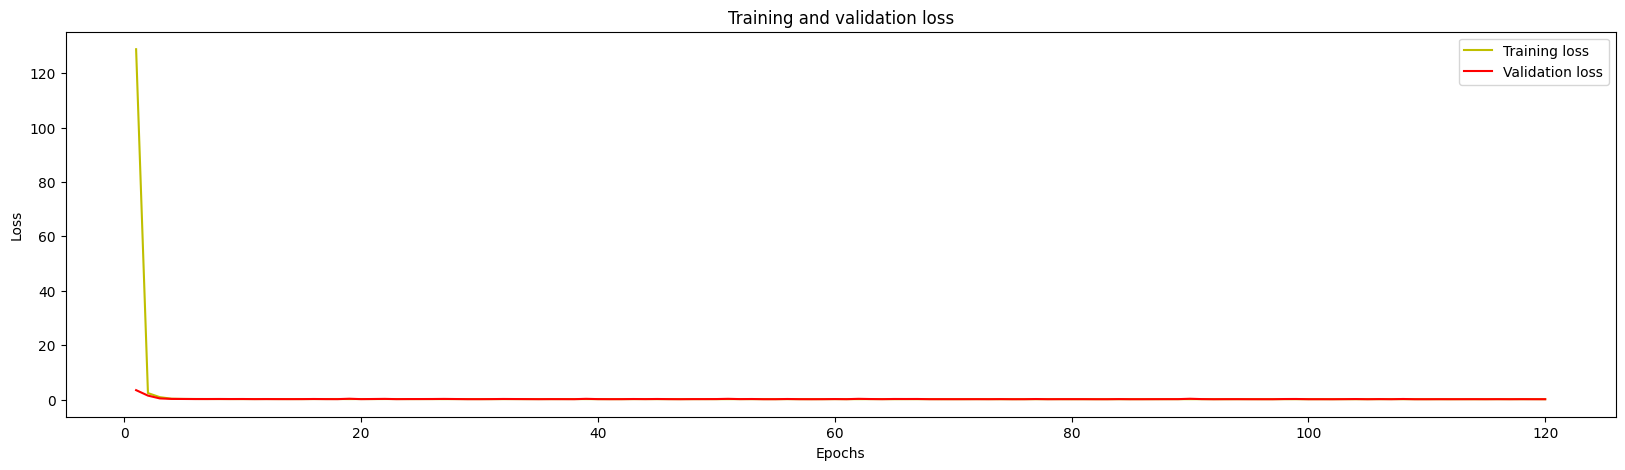

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

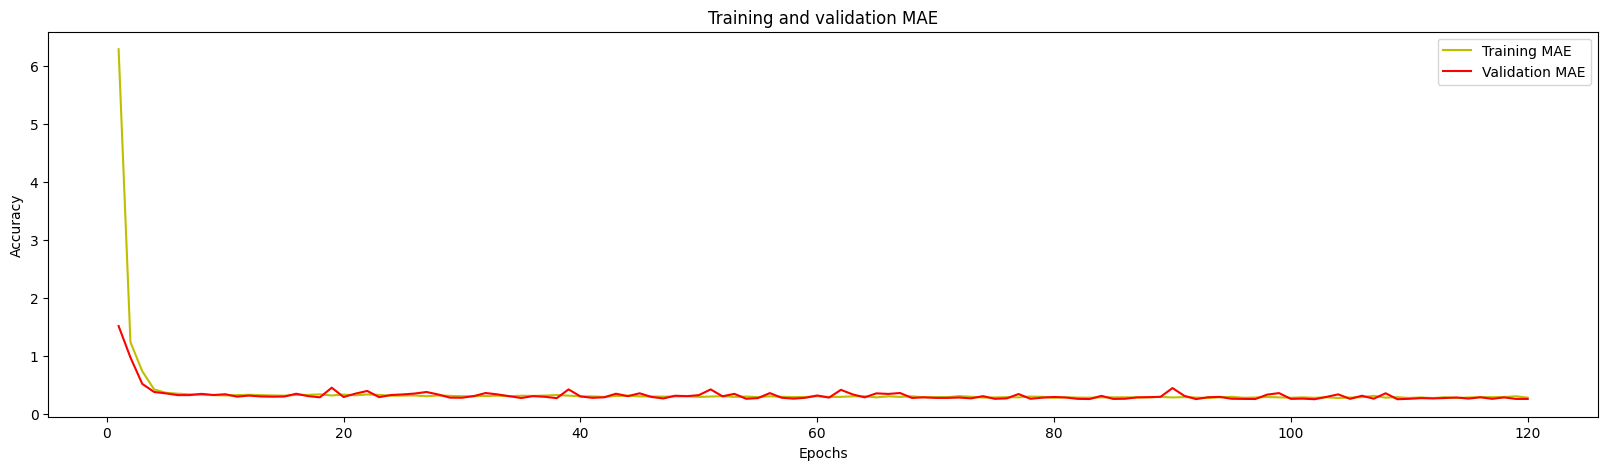

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction

In [ ]:
#Predict on test data
y_pred = model.predict(X_test_scaled)
print("Predicted values are: ", y_pred)
print("Real values are: ", y_test)

121/121 [==============================] - 0s 2ms/step
Predicted values are:  [[33.67629 ]
 [30.998333]
 [29.896288]
 ...
 [33.226074]
 [30.243238]
 [30.066753]]
Real values are:  dateTime
2012-09-06    33.88
2012-09-07    31.19
2012-09-08    30.75
2012-09-09    31.98
2012-09-10    32.54
              ...  
2023-03-16    33.12
2023-03-17    33.15
2023-03-18    33.42
2023-03-19    30.69
2023-03-20    31.01
Name: tempMax, Length: 3848, dtype: float64


In [ ]:
T = range(y_pred.shape[0])

Text(0.5, 0, 'Values')

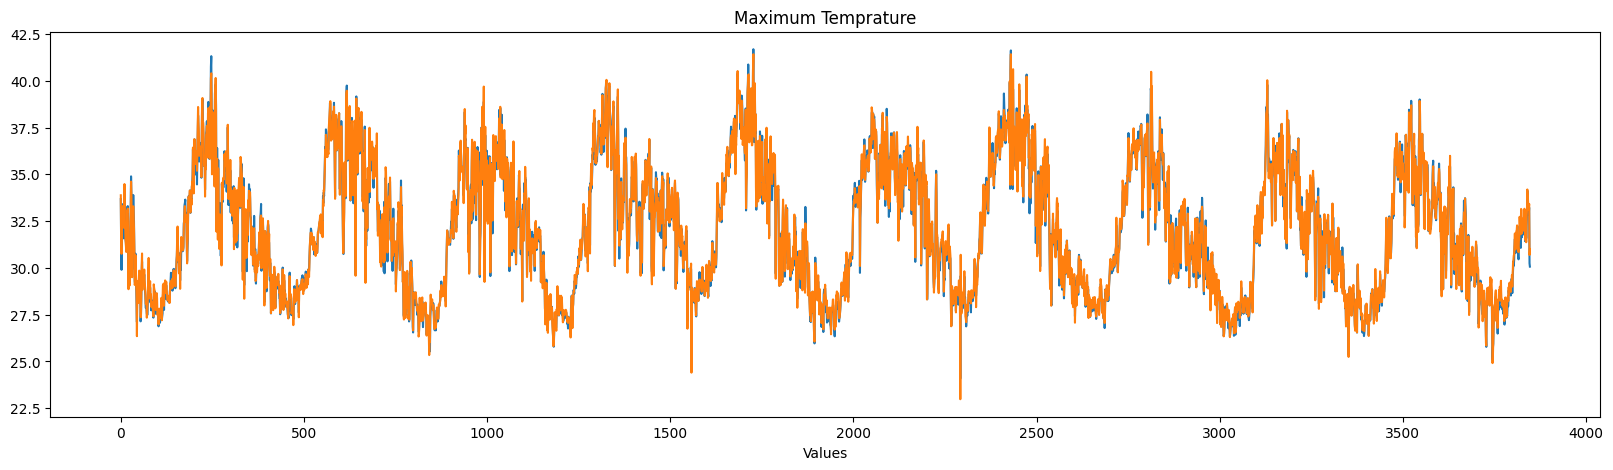

In [ ]:
plt.plot(T, y_pred[:])
plt.plot(T, y_test[:])
plt.rcParams["figure.figsize"] = (200,50)
plt.title('Maximum Temprature')
plt.xlabel('Values')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Temp_mae = mean_absolute_error(y_pred, y_test)
print(Temp_mae)

print(mean_squared_error(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.24668269070171273
0.10156112554616983
0.31868656317166844


In [ ]:
if 'high' in str(y_test).lower():
    print("""\n🚨 STAY HOME ALERT: High-intensity heat wave detected in your region.\n
- Stay indoors and avoid unnecessary travel.
- Use fans or air conditioning to keep cool.
- Drink water frequently.
- Help those at greater risk: elderly, children, and pets.\n
Follow official instructions and stay safe.\n""")
else:
    print("✅ No severe heat wave predicted. Stay alert and hydrated.")

✅ No severe heat wave predicted. Stay alert and hydrated.
